/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


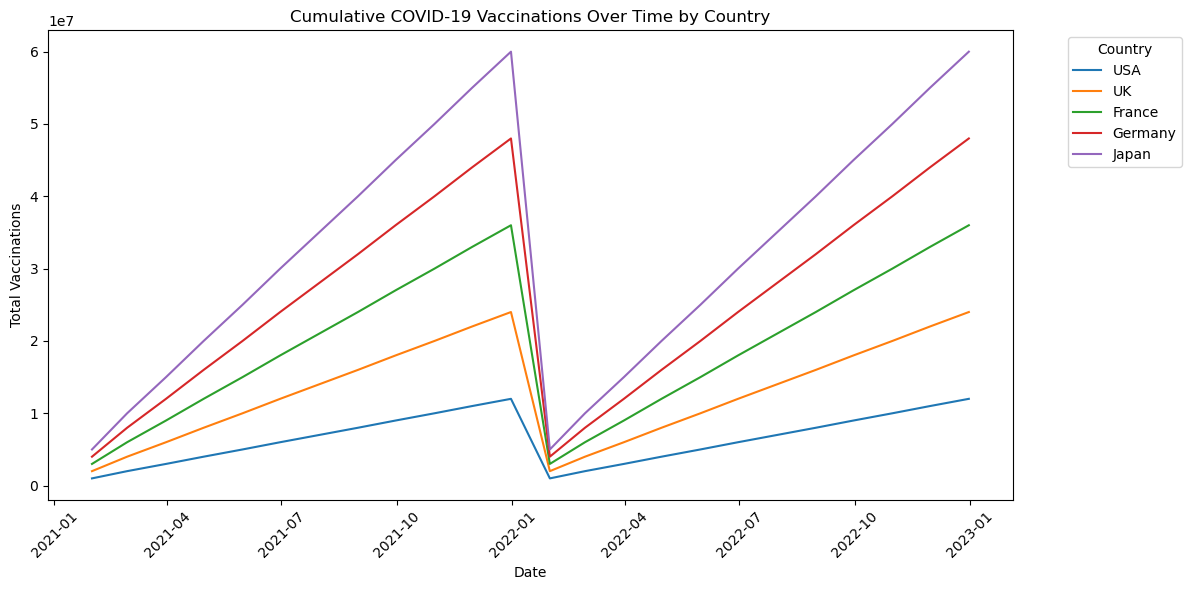

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


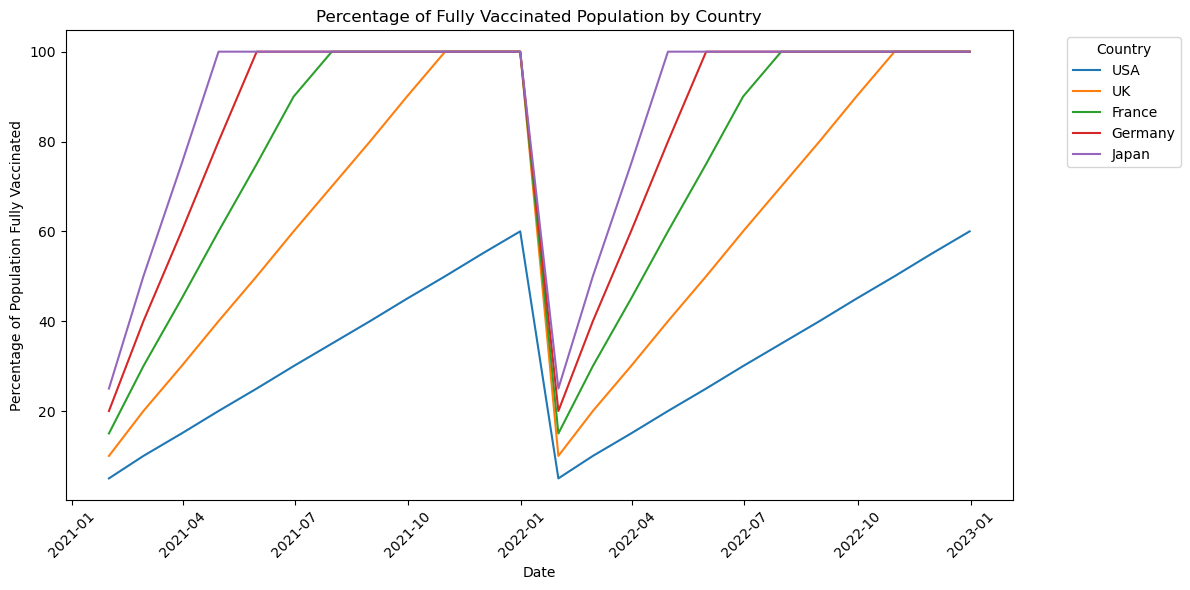

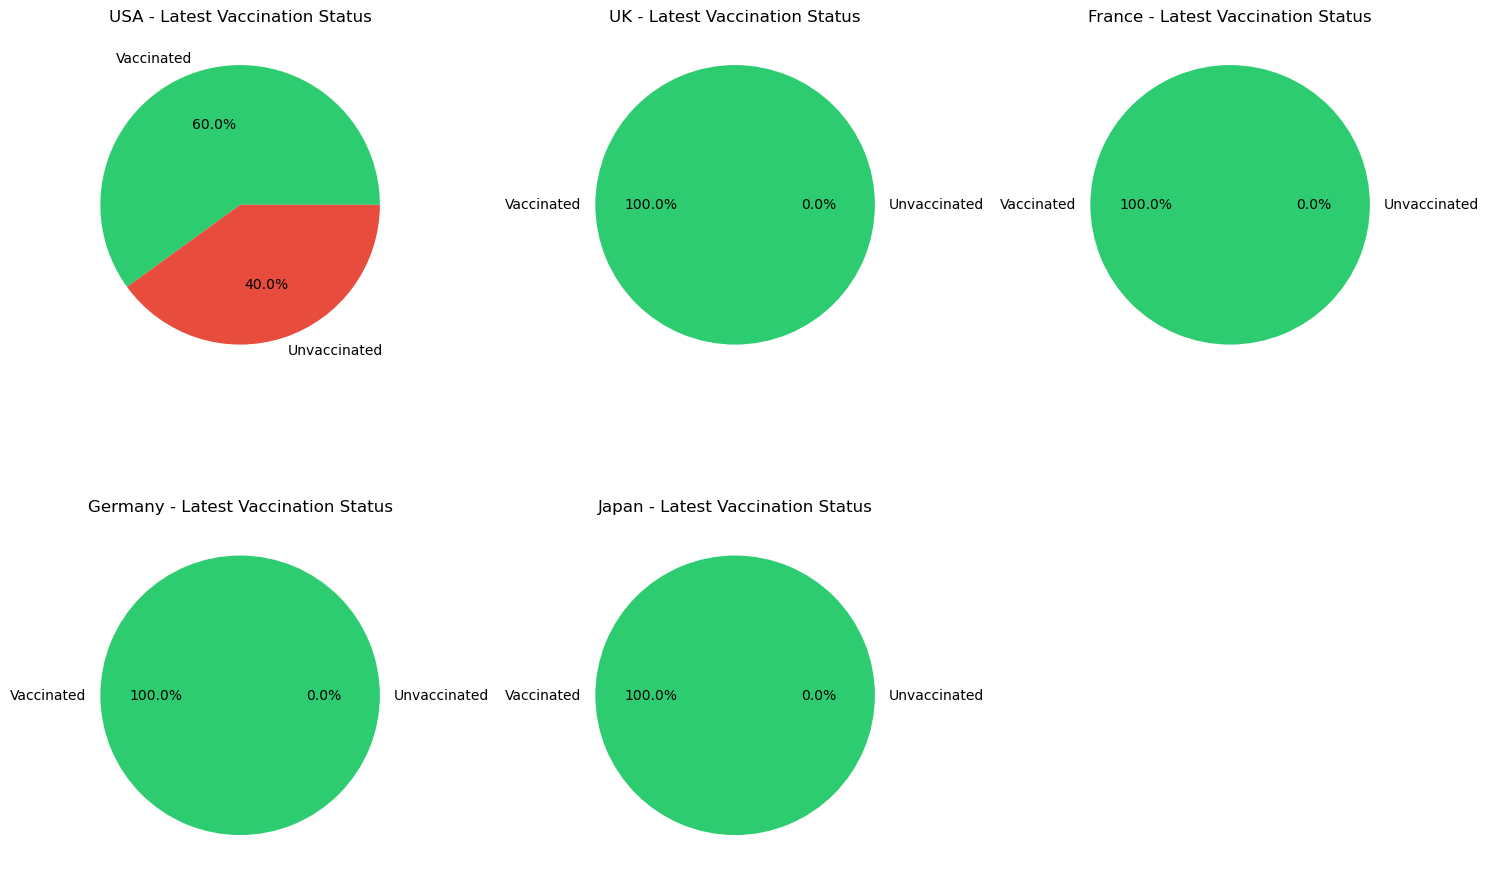

KeyError: TimeGrouper(key='date', freq=<QuarterEnd: startingMonth=12>, axis=0, sort=True, dropna=True, closed='right', label='right', how='mean', convention='e', origin='start_day')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Sample data - You'll need to replace this with your actual data
# Creating sample data for demonstration
dates = pd.date_range(start='2021-01-01', end='2022-12-31', freq='M')
countries = ['USA', 'UK', 'France', 'Germany', 'Japan']

# Create sample DataFrame
data = {
    'date': [],
    'country': [],
    'total_vaccinations': [],
    'people_fully_vaccinated_per_hundred': []
}

for country in countries:
    for date in dates:
        data['date'].append(date)
        data['country'].append(country)
        # Generate some sample vaccination data
        data['total_vaccinations'].append(int(date.strftime('%m')) * 1000000 * (countries.index(country) + 1))
        data['people_fully_vaccinated_per_hundred'].append(min(100, int(date.strftime('%m')) * 5 * (countries.index(country) + 1)))

df = pd.DataFrame(data)

# 1. Cumulative Vaccinations Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='total_vaccinations', hue='country')
plt.title('Cumulative COVID-19 Vaccinations Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Percentage of Vaccinated Population
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='people_fully_vaccinated_per_hundred', hue='country')
plt.title('Percentage of Fully Vaccinated Population by Country')
plt.xlabel('Date')
plt.ylabel('Percentage of Population Fully Vaccinated')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Pie Charts for Latest Vaccination Status
latest_data = df[df['date'] == df['date'].max()]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, country in enumerate(countries):
    country_data = latest_data[latest_data['country'] == country]
    vaccinated = country_data['people_fully_vaccinated_per_hundred'].values[0]
    unvaccinated = 100 - vaccinated
    
    axes[idx].pie([vaccinated, unvaccinated], 
                  labels=['Vaccinated', 'Unvaccinated'],
                  autopct='%1.1f%%',
                  colors=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'{country} - Latest Vaccination Status')

# Remove the last subplot if there are only 5 countries
axes[-1].remove()

plt.tight_layout()
plt.show()

# 4. Additional visualization: Heatmap of vaccination progress
pivot_data = df.pivot(index='country', 
                      columns=pd.Grouper(key='date', freq='Q'), 
                      values='people_fully_vaccinated_per_hundred')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Vaccination Progress Heatmap by Country and Quarter')
plt.xlabel('Quarter')
plt.ylabel('Country')
plt.tight_layout()
plt.show()